In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.utils import resample
import os

In [34]:
# Llegim el nom dels nodes.
# Obrim el fitxer '.txt' i  llegim les linies.
with open('mindboggle_ROIs_class.txt', 'r') as file:
    header_line = file.readline().strip()

    data = []

    for line in file:
        values = line.strip().split('\t')
        data.append(values)

dict_data = dict()
for i in data:
    node=int(i[0])-1
    dict_data[str(node)] = i[1]
#dict_data

### Global Metrics

In [35]:
# Read CSV File.
#file_metrics = 'table_metrics_functional.csv'
file_metrics = 'table_metrics_structural.csv'
#file_metrics = 'table_metrics_morphological.csv'

df = pd.read_csv(os.path.join('/home/guillem/Downloads/', file_metrics))
df.head()


,Var1,id,redcap_event_name,controls_ms,dob,msonset,nrldate,age,sex,dd,...,max_degree,density,clustering_coef,assortativity,betw_centr,eglob,eloc,modularity,transitivity,strength
0,0,002MSVIS,year3_arm_1,1,04-Sep-1963,10-Jan-1993,16-Mar-2015,51.53,1,22.18,...,36.761834,0.536491,0.259576,0.026220,36.157895,0.482570,0.469144,1.631579,0.001710,24.667058
1,1,003MSVIS,year5_arm_1,1,18-Jan-1959,15-Jul-2007,08-Feb-2017,58.06,0,9.57,...,36.053176,0.560702,0.219474,0.051864,37.986842,0.530038,0.507271,1.368421,0.004531,21.187814
2,2,004MSVIS,year5_arm_1,1,16-Sep-1956,15-Sep-2010,29-Jun-2017,60.78,1,6.79,...,36.985981,0.564561,0.248625,0.034853,28.763158,0.459488,0.444806,2.013158,0.000349,24.915529
3,3,005MSVIS,year5_arm_1,1,01-Feb-1978,01-Aug-2007,13-Jan-2016,37.95,0,8.45,...,35.185727,0.563158,0.241920,0.014929,26.842105,0.555599,0.545776,1.631579,0.011115,23.387086
4,4,010MSVIS,year5_arm_1,1,13-Feb-1964,15-Sep-2007,04-Oct-2016,52.64,0,9.05,...,36.398584,0.561404,0.238535,0.022071,25.407895,0.551295,0.547722,1.644737,0.012371,23.310044


* Implementa la imputació de valors nuls per assegurar-te un bon anàlisi davant les dades incompletes.

In [36]:
# Imputació de valors null
# Check which columns has null values.
for variable in df.columns:
    if df[variable].isna().any():
        print(f"Column {variable} needs imputation in NULL values.")


Column redcap_event_name needs imputation in NULL values.
Column dmd needs imputation in NULL values.
Column uGMSSS needs imputation in NULL values.
Column oGMSSS needs imputation in NULL values.
Column sdmt needs imputation in NULL values.
Column sdmtz needs imputation in NULL values.
Column pasat needs imputation in NULL values.
Column zpasat needs imputation in NULL values.
Column zverbalmemory needs imputation in NULL values.
Column zvisualmemory needs imputation in NULL values.
Column zattention needs imputation in NULL values.
Column zfluency needs imputation in NULL values.
Column zglobal needs imputation in NULL values.


In [37]:
# Summary of all columns
df.describe()

,Var1,controls_ms,age,sex,dd,mstype,dmd,edss,uGMSSS,oGMSSS,...,max_degree,density,clustering_coef,assortativity,betw_centr,eglob,eloc,modularity,transitivity,strength
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,146.000000,165.000000,147.000000,147.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,82.000000,0.890909,46.161529,0.278788,14.110788,0.060606,2.527397,2.369697,3.031156,2.501483,...,36.676796,0.548164,0.266391,0.037577,25.759729,0.484182,0.486202,1.631180,0.004751,23.807550
std,47.775517,0.312702,10.602227,0.449768,10.051942,0.591577,3.167062,1.802689,2.008814,1.960155,...,1.316136,0.029525,0.033129,0.013866,12.308926,0.059519,0.044790,0.238585,0.004579,1.340221
min,0.000000,0.000000,22.660000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.490000,0.234000,...,33.639402,0.416842,0.201167,-0.006001,0.078947,0.375263,0.421919,1.355263,0.000000,17.246148
25%,41.000000,1.000000,38.210000,0.000000,7.750000,0.000000,0.000000,1.500000,1.415000,0.939500,...,35.909436,0.536491,0.236067,0.028316,21.750000,0.434500,0.444272,1.447368,0.001257,22.832953
50%,82.000000,1.000000,46.330000,0.000000,12.400000,0.000000,1.000000,2.000000,2.530000,1.922000,...,36.452679,0.557193,0.261784,0.037253,28.842105,0.497635,0.483408,1.592105,0.003230,23.965980
75%,123.000000,1.000000,53.840000,1.000000,19.600000,0.000000,4.750000,3.000000,4.395000,3.488000,...,37.169432,0.567018,0.296556,0.045961,34.592105,0.532860,0.523171,1.671053,0.006868,24.822091
max,164.000000,1.000000,72.220000,1.000000,46.130000,2.000000,14.000000,7.500000,9.290000,9.130000,...,43.419395,0.586316,0.353665,0.096538,46.131579,0.569430,0.577313,3.052632,0.017705,26.006809


In [38]:
# Select the required columns.
columns_x = ['age', 'sex', 'edges', 'degree', 'max_degree', 'density', 'clustering_coef', 'assortativity', 'betw_centr', 'eglob', 'eloc', 'modularity', 'transitivity', 'strength']

# Fill missing values using the mean().
#df.fillna(df.mean(), inplace=True)

X = df[columns_x]
X.head()

,age,sex,edges,degree,max_degree,density,clustering_coef,assortativity,betw_centr,eglob,eloc,modularity,transitivity,strength
0,51.53,1,1874.131306,20.171053,36.761834,0.536491,0.259576,0.026220,36.157895,0.482570,0.469144,1.631579,0.001710,24.667058
1,58.06,0,1608.638853,21.157895,36.053176,0.560702,0.219474,0.051864,37.986842,0.530038,0.507271,1.368421,0.004531,21.187814
2,60.78,1,1893.332547,21.197368,36.985981,0.564561,0.248625,0.034853,28.763158,0.459488,0.444806,2.013158,0.000349,24.915529
3,37.95,0,1771.929678,21.486842,35.185727,0.563158,0.241920,0.014929,26.842105,0.555599,0.545776,1.631579,0.011115,23.387086
4,52.64,0,1765.862628,21.407895,36.398584,0.561404,0.238535,0.022071,25.407895,0.551295,0.547722,1.644737,0.012371,23.310044


In [39]:
y = df['controls_ms']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: controls_ms, dtype: int64

In [40]:
df_HV = df[df['controls_ms'] == 0]
df_MS = df[df['controls_ms'] == 1]


In [41]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Agafem les metriques que es diferencien significativament entre MS i HV per Correcció de Bonferroni.
alpha = 0.05

def check_normality(data, alpha):
    _, p_value = shapiro(data)
    return p_value > alpha

list_significative_metrics = list()
list_bonferroni_correction = dict()
num_matrius = len(df)

for metric in ['edges', 'degree', 'max_degree', 'density', 'clustering_coef', 'assortativity', 'betw_centr', 'eglob', 'eloc', 'modularity','transitivity', 'strength']:
    dades_HV = df[df['controls_ms'] == 0][metric]
    dades_MS = df[df['controls_ms'] == 1][metric]

    normalitat_MS = check_normality(dades_MS, alpha)
    normalitat_HV = check_normality(dades_HV, alpha)
    
    # Es comprova si les dades segueixen una distribució normal.
    if normalitat_MS and normalitat_HV:
        # Si HV i MS segueixen una distribució normal, utilitzem la prova t.
        _, pval = ttest_ind(dades_HV, dades_MS)
        
    # Si no segueixen una distribució normal.
    else:
        # S'utilitza la prova U de Mann-Whitney
        _, pval = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
    
    # S'aplica la correció de bonferroni.
    pval_corrected = pval*num_matrius
    
    # Si el pvalue es menor de alpha.
    if pval_corrected <= alpha:
        print(f"Metric: {metric} pvalue: {pval_corrected}")
        list_bonferroni_correction[metric] = pval_corrected   
        list_significative_metrics.append(metric)
        

Metric: degree pvalue: 0.036198674207045006
Metric: density pvalue: 0.029421755762413508


In [42]:
# Mètriques amb diferències significatives entr eMS i HV.
list(list_bonferroni_correction.keys())

['degree', 'density']

In [43]:
# Constructuct Table (as 'Table 2')
# HEADER: ('MS patients (N = XXX)', 'HV (N = YYY)', 'p value')
# Metrics:  
# 'degree': 0.36 (0.02)  0.34 (0.02)  < 0.001
# etc.

print("Metric  -  MS patients  -  HV volunteers  -  Pvalue")
for metric in list(list_bonferroni_correction.keys()):
    mean_MS_ = np.mean(df_MS[metric])
    std_MS_ = np.std(df_MS[metric])
    
    mean_HV_ = np.mean(df_MS[metric])
    std_HV_ = np.std(df_MS[metric])
    
    print(f'Metric - {metric}: MS: {mean_MS_} ({std_MS_}), HV: {mean_HV_} ({std_HV_}), Pvalue: {list_bonferroni_correction[metric]} \n')


Metric  -  MS patients  -  HV volunteers  -  Pvalue
Metric - degree: MS: 20.618152524167563 (1.1651552682823356), HV: 20.618152524167563 (1.1651552682823356), Pvalue: 0.036198674207045006 

Metric - density: MS: 0.5458956916099772 (0.02996738237400254), HV: 0.5458956916099772 (0.02996738237400254), Pvalue: 0.029421755762413508 



In [44]:
#list_significative_metrics.append('sex')
#list_significative_metrics.append('age')

# Llistat a utilitzar per aplicar models ML.
print(list(list_significative_metrics))

['degree', 'density']


Training set - Features: (132, 2), Labels: (132,)
Testing set - Features: (33, 2) Labels: (33,)


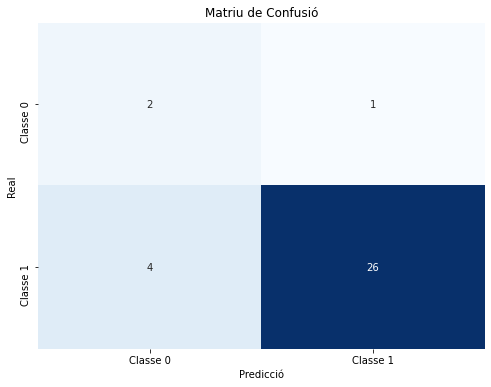

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.67      0.44         3
           1       0.96      0.87      0.91        30

    accuracy                           0.85        33
   macro avg       0.65      0.77      0.68        33
weighted avg       0.91      0.85      0.87        33



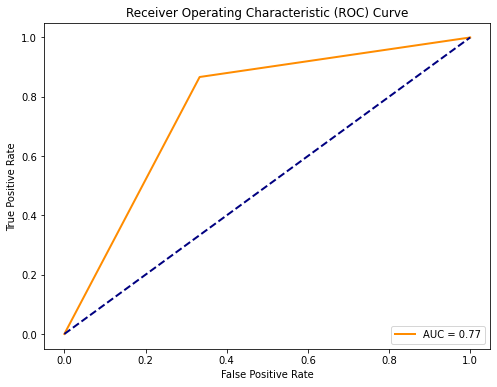

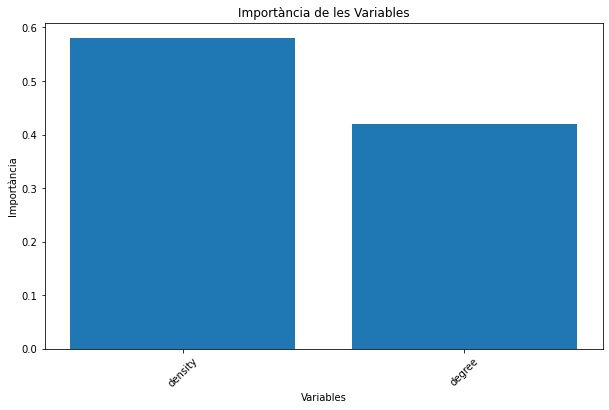

In [45]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionem les variables significatives.
X_selected_cols = X[list_significative_metrics]

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# RANDOM FOREST CLASSIFIER
# Creem el model de Random Forest Classifier.
model_RFC = RandomForestClassifier(random_state=42)

# Entrenem el model utilitzant dades d'entrenament.
model_RFC.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_RFC.predict(X_test)

# Evaluem el model RFC.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model RFC.
importancia = model_RFC.feature_importances_

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Global: Support Vector Machine**

Training set - Features: (132, 2), Labels: (132,)
Testing set - Features: (33, 2) Labels: (33,)


/home/guillem/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


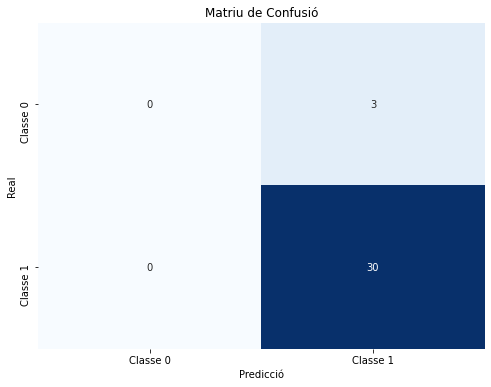

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.91      1.00      0.95        30

    accuracy                           0.91        33
   macro avg       0.45      0.50      0.48        33
weighted avg       0.83      0.91      0.87        33



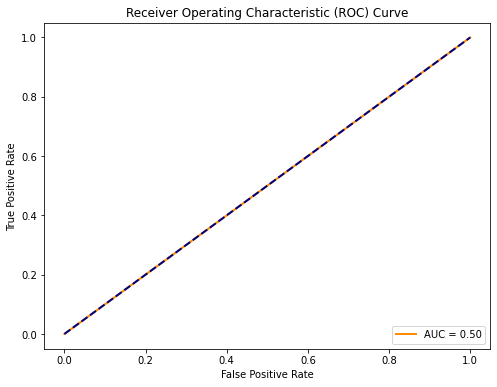

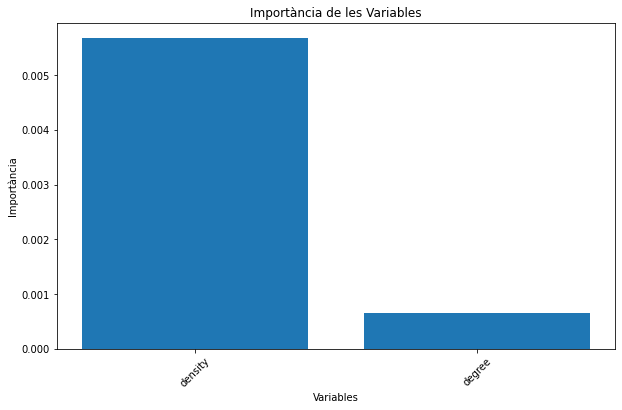

In [46]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# Seleccionem les variables significatives.
X_selected_cols = X[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# Suppot Vector Machine (SVM).
# Creem el model de Suppor vector Machine.
model_SVM = SVC(kernel='linear')

# Entrenem el model utilitzant dades d'entrenament.
model_SVM.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_SVM.predict(X_test)

# Evaluem el model.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_SVM.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Global: KNN**

Training set - Features: (132, 2), Labels: (132,)
Testing set - Features: (33, 2) Labels: (33,)


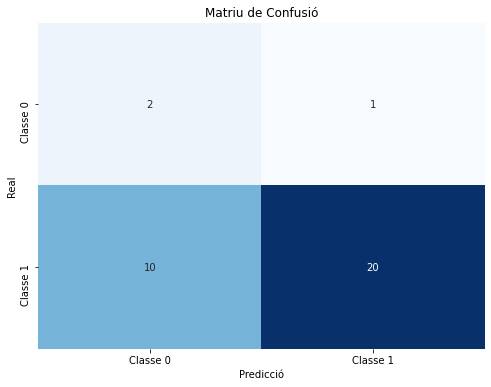

Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.67      0.27         3
           1       0.95      0.67      0.78        30

    accuracy                           0.67        33
   macro avg       0.56      0.67      0.53        33
weighted avg       0.88      0.67      0.74        33



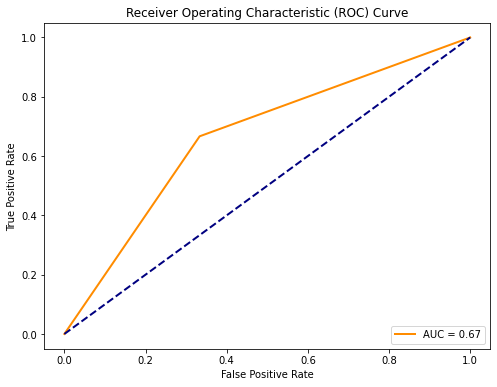

In [47]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Seleccionem les variables significatives.
X_selected_cols = X[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# KNN
# Se crea el modelo KNN.
model_KNN = KNeighborsClassifier(n_neighbors=2)

# Entrenem el model utilitzant dades d'entrenament.
model_KNN.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_KNN.predict(X_test)

# Evaluem el model KNN.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


* **Global: Logistic Regression**

/home/guillem/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


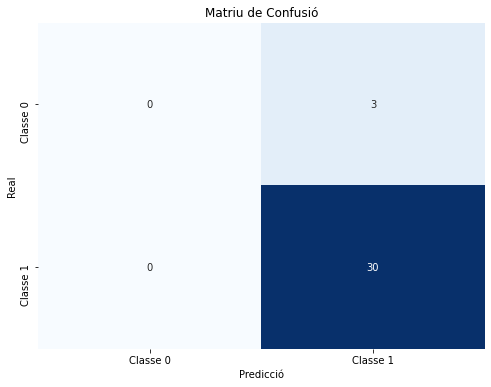

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.91      1.00      0.95        30

    accuracy                           0.91        33
   macro avg       0.45      0.50      0.48        33
weighted avg       0.83      0.91      0.87        33



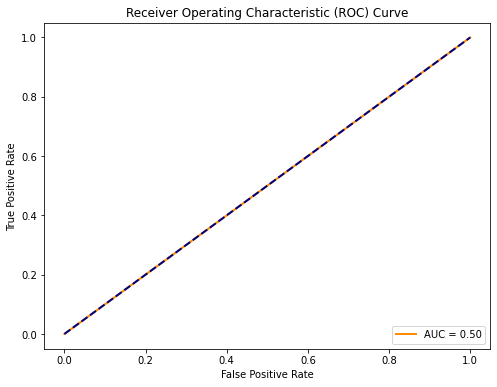

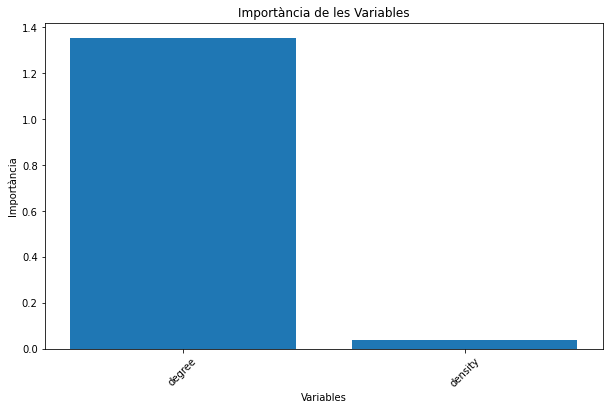

In [48]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Seleccionem les variables significatives.
X_selected_cols = df[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Logistic Regression
# Se crea el modelo Logistic Regression.
model_LR = LogisticRegression()

# Entrenem el model utilitzant dades d'entrenament.
model_LR.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_LR.predict(X_test)

# Evaluem el model Logistic Regression.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_LR.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Global: Gaussian Naive Bayes**

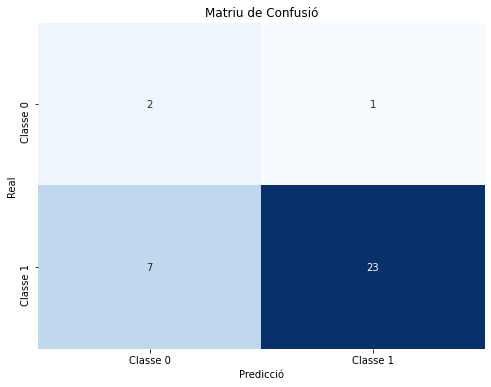

Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.67      0.33         3
           1       0.96      0.77      0.85        30

    accuracy                           0.76        33
   macro avg       0.59      0.72      0.59        33
weighted avg       0.89      0.76      0.80        33



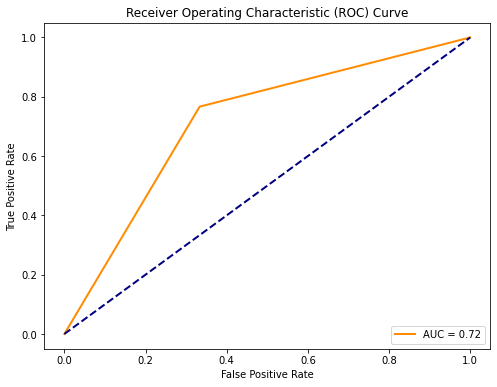

In [49]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

# Seleccionem les variables significatives.
X_selected_cols = df[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Gaussian Naive Bayes
# Se crea el modelo Gaussian Naive Bayes.
model_GNB = GaussianNB()

# Entrenem el model utilitzant dades d'entrenament.
model_GNB.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_GNB.predict(X_test)

# Evaluem el model Gaussian Naive Bayes.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Local Metrics

In [18]:
# Read CSV File.
#file_metrics = 'table_metrics_local_functional.csv'
file_metrics = 'table_metrics_local_structural.csv'
#file_metrics = 'table_metrics_local_morphological.csv'

df_local = pd.read_csv(os.path.join('/home/guillem/Downloads/', file_metrics))
df_local.head()


,Var1,id,redcap_event_name,controls_ms,dob,msonset,nrldate,age,sex,dd,...,modularity_66,modularity_67,modularity_68,modularity_69,modularity_70,modularity_71,modularity_72,modularity_73,modularity_74,modularity_75
0,0,002MSVIS,year3_arm_1,1,04-Sep-1963,10-Jan-1993,16-Mar-2015,51.53,1,22.18,...,2,2,2,2,2,2,2,2,2,2
1,1,003MSVIS,year5_arm_1,1,18-Jan-1959,15-Jul-2007,08-Feb-2017,58.06,0,9.57,...,1,1,1,1,1,1,1,1,1,1
2,2,004MSVIS,year5_arm_1,1,16-Sep-1956,15-Sep-2010,29-Jun-2017,60.78,1,6.79,...,2,2,2,2,2,2,2,2,2,2
3,3,005MSVIS,year5_arm_1,1,01-Feb-1978,01-Aug-2007,13-Jan-2016,37.95,0,8.45,...,1,1,1,1,1,1,1,1,1,1
4,4,010MSVIS,year5_arm_1,1,13-Feb-1964,15-Sep-2007,04-Oct-2016,52.64,0,9.05,...,1,1,1,1,1,1,1,1,1,1


In [19]:
# Obtenim el llistat de mètriques locals.
# Get index of 'degree_0'.
index_of_degree0 = df_local.columns.get_loc('degree_0')
list_local_metrics = list(df_local.columns)[index_of_degree0:]


In [20]:
df_MS_local = df_local[df_local['controls_ms'] == 1]
df_HV_local = df_local[df_local['controls_ms'] == 0]

In [21]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Agafem les metriques que es diferencien significativament entre MS i HV per Correcció de Bonferroni.
alpha = 0.05

def check_normality(data, alpha):
    _, p_value = shapiro(data)
    return p_value > alpha

list_significative_metrics_local = list()
list_bonferroni_correction_local = dict()
num_matrius = len(df)

for metric in list_local_metrics:
    dades_HV = df_local[df_local['controls_ms'] == 0][metric]
    dades_MS = df_local[df_local['controls_ms'] == 1][metric]

    normalitat_MS = check_normality(dades_MS, alpha)
    normalitat_HV = check_normality(dades_HV, alpha)
    
    # Es comprova si les dades segueixen una distribució normal.
    if normalitat_MS and normalitat_HV:
        # Si HV i MS segueixen una distribució normal, utilitzem la prova t.
        _, pval = ttest_ind(dades_HV, dades_MS)
        
    # Si no segueixen una distribució normal.
    else:
        # S'utilitza la prova U de Mann-Whitney
        _, pval = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
    
    # S'aplica la correció de bonferroni.
    pval_corrected = pval*num_matrius
    
    # Si el pvalue es menor de alpha.
    if pval_corrected <= alpha:
        print(f"Metric: {metric} pvalue: {pval_corrected}")
        list_bonferroni_correction_local[metric] = pval_corrected   
        list_significative_metrics_local.append(metric)
        

/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats

Metric: degree_39 pvalue: 0.008599241821237672
Metric: degree_42 pvalue: 0.0026786054855368058
Metric: degree_44 pvalue: 0.0020040902727432694


/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats

Metric: strength_45 pvalue: 0.03813353947618128


In [22]:
# Mètriques amb diferències significatives entr eMS i HV.
list(list_bonferroni_correction_local.keys())

['degree_39', 'degree_42', 'degree_44', 'strength_45']

In [23]:
# Constructuct Table (as 'Table 2')
# HEADER: ('MS patients (N = XXX)', 'HV (N = YYY)', 'p value')
# Metrics:  
# 'degree': 0.36 (0.02)  0.34 (0.02)  < 0.001
# etc.

print("Metric  -  MS patients  -  HV volunteers  -  Pvalue")
for metric in list(list_bonferroni_correction_local.keys()):
    mean_MS_ = np.mean(df_MS_local[metric])
    std_MS_ = np.std(df_MS_local[metric])
    
    mean_HV_ = np.mean(df_MS_local[metric])
    std_HV_ = np.std(df_MS_local[metric])
    
    print(f'Metric - {metric}: MS: {mean_MS_} ({std_MS_}), HV: {mean_HV_} ({std_HV_}), Pvalue: {list_bonferroni_correction_local[metric]} \n')


Metric  -  MS patients  -  HV volunteers  -  Pvalue
Metric - degree_39: MS: 23.41496598639456 (1.9651505885243932), HV: 23.41496598639456 (1.9651505885243932), Pvalue: 0.008599241821237672 

Metric - degree_42: MS: 20.789115646258505 (4.171870968903972), HV: 20.789115646258505 (4.171870968903972), Pvalue: 0.0026786054855368058 

Metric - degree_44: MS: 13.802721088435375 (2.5169884169212664), HV: 13.802721088435375 (2.5169884169212664), Pvalue: 0.0020040902727432694 

Metric - strength_45: MS: 21.704053529594717 (3.907827543301227), HV: 21.704053529594717 (3.907827543301227), Pvalue: 0.03813353947618128 



* **Local: Random Forest Classifier**

Training set - Features: (132, 4), Labels: (132,)
Testing set - Features: (33, 4) Labels: (33,)


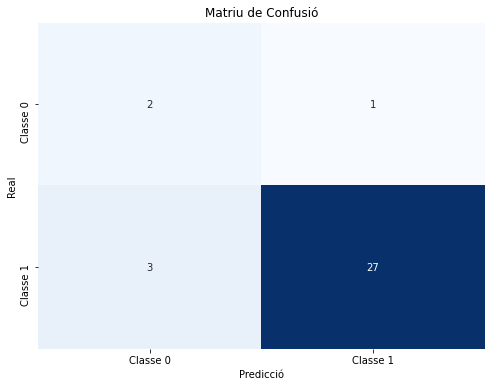

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.96      0.90      0.93        30

    accuracy                           0.88        33
   macro avg       0.68      0.78      0.72        33
weighted avg       0.91      0.88      0.89        33



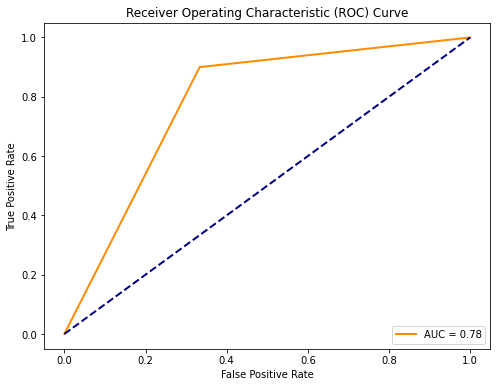

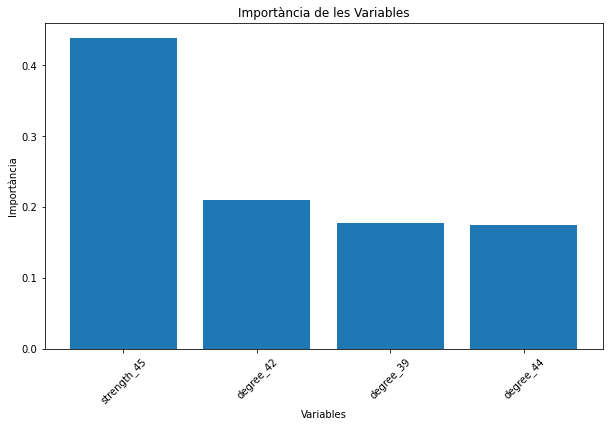

In [24]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# RANDOM FOREST CLASSIFIER
# Creem el model de Random Forest Classifier.
model_RFC = RandomForestClassifier(random_state=42)

# Entrenem el model utilitzant dades d'entrenament.
model_RFC.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_RFC.predict(X_test)

# Evaluem el model RFC.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model RFC.
importancia = model_RFC.feature_importances_

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics_local[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Local: Support Vector Machine (SVM)**

Training set - Features: (132, 4), Labels: (132,)
Testing set - Features: (33, 4) Labels: (33,)


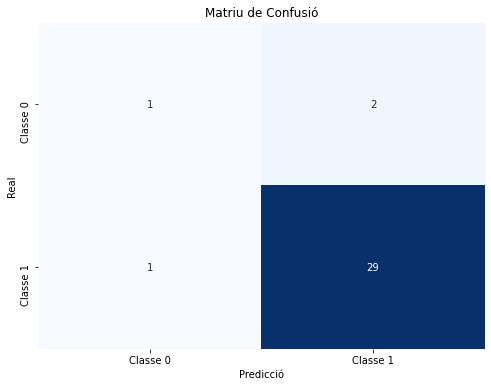

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.94      0.97      0.95        30

    accuracy                           0.91        33
   macro avg       0.72      0.65      0.68        33
weighted avg       0.90      0.91      0.90        33



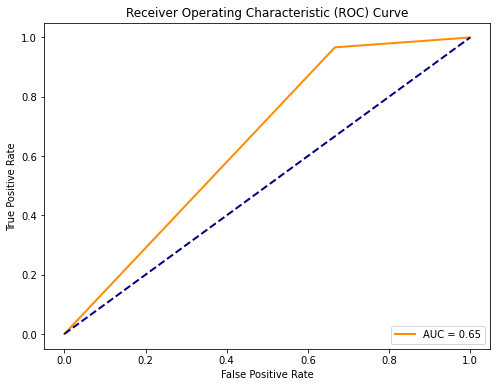

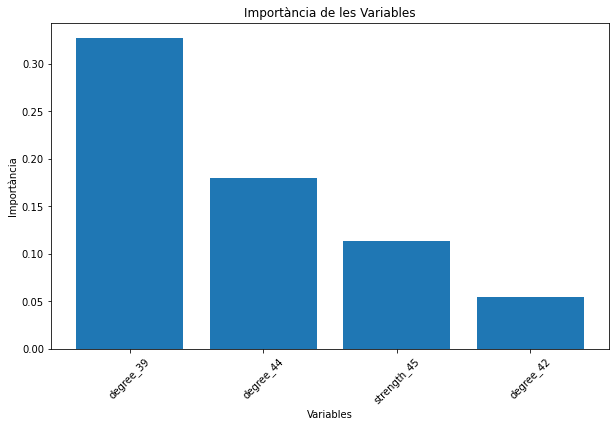

In [25]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# Suppot Vector Machine (SVM).
# Creem el model de Suppor vector Machine.
model_SVM = SVC(kernel='linear')

# Entrenem el model utilitzant dades d'entrenament.
model_SVM.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_SVM.predict(X_test)

# Evaluem el model.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_SVM.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics_local[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Local: KNN** 

Training set - Features: (132, 4), Labels: (132,)
Testing set - Features: (33, 4) Labels: (33,)


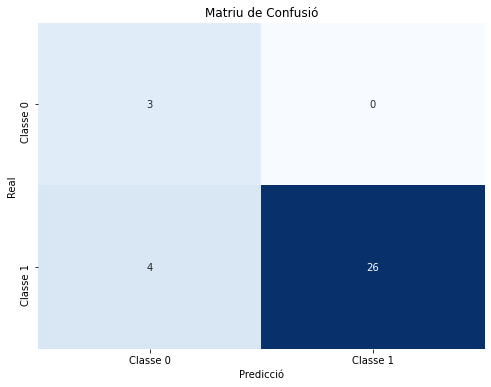

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.43      1.00      0.60         3
           1       1.00      0.87      0.93        30

    accuracy                           0.88        33
   macro avg       0.71      0.93      0.76        33
weighted avg       0.95      0.88      0.90        33



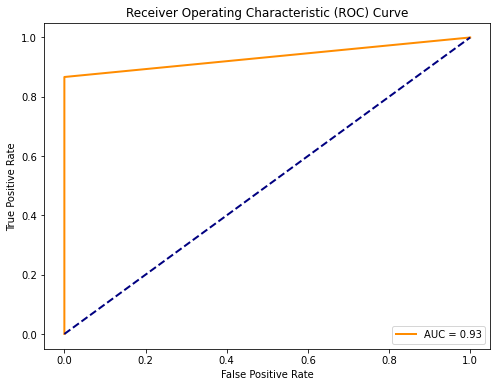

In [26]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# KNN
# Se crea el modelo KNN.
model_KNN = KNeighborsClassifier(n_neighbors=2)

# Entrenem el model utilitzant dades d'entrenament.
model_KNN.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_KNN.predict(X_test)

# Evaluem el model KNN.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


* **Local: Logistic regression**

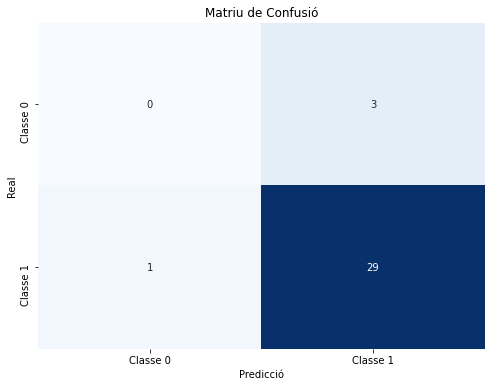

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.91      0.97      0.94        30

    accuracy                           0.88        33
   macro avg       0.45      0.48      0.47        33
weighted avg       0.82      0.88      0.85        33



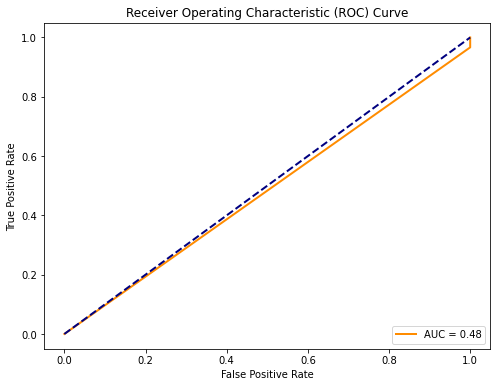

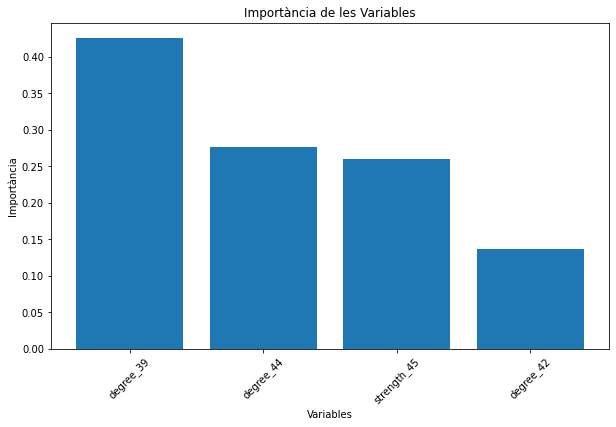

In [27]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Logistic Regression
# Se crea el modelo Logistic Regression.
model_LR = LogisticRegression()

# Entrenem el model utilitzant dades d'entrenament.
model_LR.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_LR.predict(X_test)

# Evaluem el model Logistic Regression.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_LR.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics_local[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Local: Gaussian Naive Bayes (GNB)**

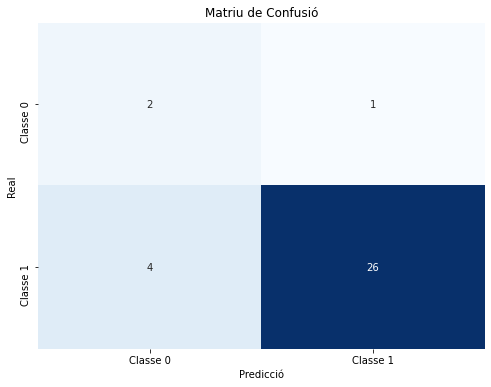

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.67      0.44         3
           1       0.96      0.87      0.91        30

    accuracy                           0.85        33
   macro avg       0.65      0.77      0.68        33
weighted avg       0.91      0.85      0.87        33



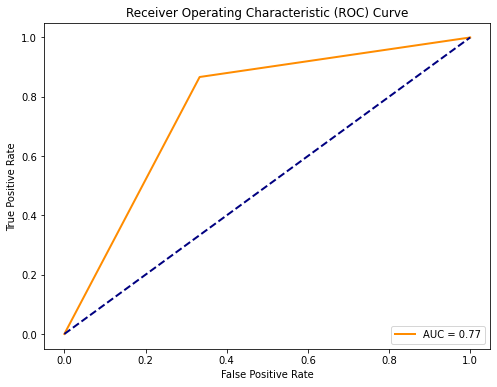

In [28]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Gaussian Naive Bayes
# Se crea el modelo Gaussian Naive Bayes.
model_GNB = GaussianNB()

# Entrenem el model utilitzant dades d'entrenament.
model_GNB.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_GNB.predict(X_test)

# Evaluem el model Gaussian Naive Bayes.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


* Clinical and demographic characteristics of the subjects included in the study.

In [29]:
# Construct Table 1 (Clinic and demographic characteristics of the subjects).

demographic_features_variables = ['sex', 'age']
demographic_features_variables_dict = dict()

for var in demographic_features_variables:
    dades_HV = df_HV[var]
    dades_MS = df_MS[var]

    normalitat_HV = check_normality(dades_HV, 0.05)
    normalitat_MS = check_normality(dades_MS, 0.05)
    
    if normalitat_HV and normalitat_MS:
        _, pvalue_t = ttest_ind(dades_HV, dades_MS)
        #print("pvalue_t:", pvalue_t)
        demographic_features_variables_dict[var] = pvalue_t
    
    # Prova mostres independents.
    else:
        _, pvalue_u = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
        #print("pvalue_u:", pvalue_u)
        demographic_features_variables_dict[var] = pvalue_u
        

In [30]:
# RRMS: 0, SPMS: 1, PPMS (2)
RRMS = df_MS[df_MS['mstype'] == 0].count()['mstype']
SPMS = df_MS[df_MS['mstype'] == 1].count()['mstype']
PPMS = df_MS[df_MS['mstype'] == 2].count()['mstype']

perc_RRMS = RRMS/len(list(df_MS['mstype']))
perc_SPMS = SPMS/len(list(df_MS['mstype']))
perc_PPMS = PPMS/len(list(df_MS['mstype']))


In [31]:
# Obtenim la mitjana de volum de tots els nodes Controls.
# Llegir excel.
volum_df_HV = pd.read_excel('VOLUM_NODES_CONTROLS.xls')

# Calculem la mitjana de tots els nodes.
column_avg_HV = volum_df_HV.mean()
avg_volum_HV = column_avg_HV.mean()
std_volum_HV = column_avg_HV.std()


# Obtenim la mitjana de volum de tots els nodes MS.
# Llegir excel.
volum_df_MS = pd.read_excel('VOLUM_NODES_PATIENTS.xls')

# Calculem la mitjana de tots els nodes.
column_avg_MS = volum_df_MS.mean()
avg_volum_MS = column_avg_MS.mean()
std_volum_MS = column_avg_MS.std()

# Comprovem la normalitat i calculem el pvalue.
dades_HV = column_avg_HV
dades_MS = column_avg_MS

normalitat_HV = check_normality(dades_HV, 0.05)
normalitat_MS = check_normality(dades_MS, 0.05)

if normalitat_HV and normalitat_MS:
    _, pvalue_volum = ttest_ind(dades_HV, dades_MS)
    print("pvalue_t:", pvalue_volum)

# Prova mostres independents.
else:
    _, pvalue_volum = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
    print("pvalue_u:", pvalue_volum)
    

pvalue_u: 0.4622499461255427


In [32]:
print("          'MS patients'     'HV volunteers'    'Pvalue'\n")
print(f"Female (N, %): {(df_MS['sex'] == 0).sum()} ({(df_MS['sex'] == 0).sum()/len(list(df_MS['sex']))}), {(df_HV['sex'] == 0).sum()} ({(df_HV['sex'] == 0).sum()/len(list(df_HV['sex']))}) pvalue: {demographic_features_variables_dict['sex']}")
print(f"Age (years): {np.mean(df_MS['age'])} ({np.std(df_MS['age'])}), {np.mean(df_HV['age'])} ({np.std(df_HV['age'])}), pvalue: {demographic_features_variables_dict['age']}\n")
print("Type of MS:")
print(f"RRMS: {RRMS} ({perc_RRMS})  na  na")
print(f"SPMS: {SPMS} ({perc_SPMS})  na  na")
print(f"PPMS: {PPMS} ({perc_PPMS})  na  na\n")
print(f"Avg Node volum: {avg_volum_MS}, {avg_volum_HV}, p_value: {pvalue_volum}")
print(f"Disease Duration: {np.mean(df_MS['dd'])} ({np.std(df_MS['dd'])}),   na   na  ")
print(f"EDSS Score (gravetat): {np.mean(df_MS['edss'])} ({np.std(df_MS['edss'])}),   na   na  ")
print(f"zSDMT: {np.mean(df_MS['sdmtz'])} ({np.std(df_MS['sdmtz'])}),   na   na  ")
print(f"zPASAT: {np.mean(df_MS['zpasat'])} ({np.std(df_MS['zpasat'])}),   na   na  ")
print(f"zAttention: {np.mean(df_MS['zattention'])} ({np.std(df_MS['zattention'])}),   na   na  ")


          'MS patients'     'HV volunteers'    'Pvalue'

Female (N, %): 104 (0.7074829931972789), 15 (0.8333333333333334) pvalue: 0.26392887381763375
Age (years): 47.33013605442177 (10.110612797350703), 36.617906304661965 (9.332087414451566), pvalue: 3.5658067874371484e-05

Type of MS:
RRMS: 125 (0.8503401360544217)  na  na
SPMS: 16 (0.10884353741496598)  na  na
PPMS: 6 (0.04081632653061224)  na  na

Avg Node volum: 8635.448684210527, 9328.701754385966, p_value: 0.4622499461255427
Disease Duration: 15.961088435374148 (9.01906326713972),   na   na  
EDSS Score (gravetat): 2.6598639455782314 (1.6892883766794917),   na   na  
zSDMT: 0.07902865573770491 (1.0603561342433823),   na   na  
zPASAT: -0.2892552 (1.3281360383373986),   na   na  
zAttention: -0.2857193548387097 (1.0301272962112904),   na   na  


### Visualització en 3D cerebral amb representació dels nodes

In [51]:
# Llegim el fitxer.
df_nodes_coordinates = pd.read_table('Node_mindboggle_default.node', header = None)
df_nodes_coordinates.rename(columns={0: "x", 1: "y", 2: "z", 5: "node_name"}, inplace = True)
df_nodes_coordinates.head()

,x,y,z,3,4,node_name
0,-4.28,16.90,28.3,2,1,ctx-lh-caudalanteriorcingulate
1,-35.20,12.00,46.5,3,1,ctx-lh-caudalmiddlefrontal
2,-6.44,-87.50,25.5,4,1,ctx-lh-cuneus
3,-22.20,-4.61,-35.8,5,1,ctx-lh-entorhinal
4,-33.30,-41.70,-21.6,6,1,ctx-lh-fusiform


In [52]:
# Create an example adjacency matrix (replace this with your own matrix)
matrix = pd.read_csv(
    os.path.join(
        os.getcwd(), 'subject_networks_rfMRI_v1', '002MSVIS_r_matrix.csv'
    ), header=None
)
adjacency_matrix = np.array(matrix)


In [53]:
# Construim el llistat de coordenades de cada node.
node_coordinates = list()

for i in range(0, 76):
    node_name = dict_data[str(i)]
    filtered_df = df_nodes_coordinates[df_nodes_coordinates['node_name'] == node_name]
    node_coordinates.append([float(filtered_df['x']), float(filtered_df['y']), float(filtered_df['z'])])
    

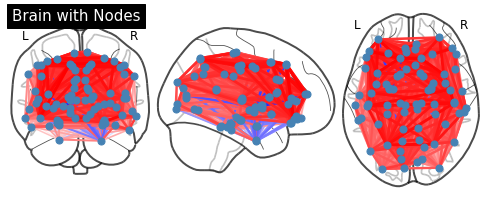

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets, plotting
from nilearn.connectome import ConnectivityMeasure

# Visualització en 3D cerebral amb representació dels nodes.
plotting.plot_connectome(
    adjacency_matrix=adjacency_matrix,
    node_coords=node_coordinates,
    node_color='steelblue',
    title='Brain with Nodes',
    display_mode='ortho',
    annotate=True,
)
plt.show()